<a href="https://colab.research.google.com/github/TonCha1/hate-speech-detection/blob/main/hate_speech_detection_using_DistillBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Check which GPU is available
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU: Tesla T4


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving raichu.csv to raichu.csv


In [ ]:
import pandas as pd
df = pd.read_csv('raichu.csv')
df.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [ ]:
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')
df

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt @mayasolovely as a woman you shouldn't com...
1,1,3,0,3,0,1,rt @mleew17 boy dats coldtyga dwn bad for cuf...
2,2,3,0,3,0,1,rt @urkindofbrand dawg rt @80sbaby4life you e...
3,3,3,0,2,1,1,rt @c_g_anderson @viva_based she look like a ...
4,4,6,0,6,0,1,rt @shenikaroberts the shit you hear about me...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220@lifeasking @20_...
24779,25292,3,0,1,2,2,you've gone and broke the wrong heart baby and...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like i aint fu...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")
df

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt @mayasolovely as a woman you shouldn't com...
1,1,3,0,3,0,1,rt @mleew17 boy dats coldtyga dwn bad for cuf...
2,2,3,0,3,0,1,rt @urkindofbrand dawg rt @80sbaby4life you e...
3,3,3,0,2,1,1,rt @c_g_anderson @viva_based she look like a ...
4,4,6,0,6,0,1,rt @shenikaroberts the shit you hear about me...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you a muthaf***in lie &#8220@lifeasking @20_pe...
24779,25292,3,0,1,2,2,you've gone and broke the wrong heart baby and...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like i aint fu...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# Remove "RT" and mentions (words starting with "@")
df['tweet'] = df['tweet'].str.replace(r'\brt\b', '', regex=True)  # Remove "RT"
df['tweet'] = df['tweet'].str.replace(r'@\w+', '', regex=True)    # Remove mentions
df

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,as a woman you shouldn't complain about cle...
1,1,3,0,3,0,1,boy dats coldtyga dwn bad for cuffin dat ho...
2,2,3,0,3,0,1,dawg you ever fuck a bitch and she start ...
3,3,3,0,2,1,1,she look like a tranny
4,4,6,0,6,0,1,the shit you hear about me might be true or...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you a muthaf***in lie &#8220 right his tl is...
24779,25292,3,0,1,2,2,you've gone and broke the wrong heart baby and...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like i aint fu...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
df = df[['tweet', 'class']]
print(df.head())

                                               tweet  class
0     as a woman you shouldn't complain about cle...      2
1     boy dats coldtyga dwn bad for cuffin dat ho...      1
2     dawg   you ever fuck a bitch and she start ...      1
3                             she look like a tranny      1
4     the shit you hear about me might be true or...      1


In [ ]:
# Renaming the columns
df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)
# Display the modified DataFrame
print(df)

                                                    text  label
0         as a woman you shouldn't complain about cle...      2
1         boy dats coldtyga dwn bad for cuffin dat ho...      1
2         dawg   you ever fuck a bitch and she start ...      1
3                                 she look like a tranny      1
4         the shit you hear about me might be true or...      1
...                                                  ...    ...
24778  you a muthaf***in lie &#8220   right his tl is...      1
24779  you've gone and broke the wrong heart baby and...      2
24780  young buck wanna eat dat nigguh like i aint fu...      1
24781              youu got wild bitches tellin you lies      1
24782  ~~ruffled | ntac eileen dahlia - beautiful col...      2

[24783 rows x 2 columns]


<ipython-input-9-60d40b85b8fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)


In [ ]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# from torch.nn import CrossEntropyLoss
# from transformers import DistilBertForSequenceClassification  # Ensure this import is here

# class DistilBERTWeighted(DistilBertForSequenceClassification):
#     def __init__(self, config, class_weights):
#         super().__init__(config)
#         self.class_weights = class_weights

#     def forward(self, input_ids=None, attention_mask=None, labels=None):
#         outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         logits = outputs.logits

#         # Apply weighted loss
#         loss_fct = CrossEntropyLoss(weight=self.class_weights.to(logits.device))
#         loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

#         return (loss, logits)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming `df` is your main dataset with 'tweet' and 'class' columns

# Step 1: Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Check the class distribution in the training and test sets
print("Original Training set class distribution:\n", train_df['label'].value_counts())
print("Original Test set class distribution:\n", test_df['label'].value_counts())

# Count the instances of each class
hate_count = len(df[df['label'] == 0])
offensive_count = len(df[df['label'] == 1])
neither_count = len(df[df['label'] == 2])
total = hate_count + offensive_count + neither_count

# Calculate weights for each class
weight_for_0 = (1 / hate_count) * (total / 3.0)
weight_for_1 = (1 / offensive_count) * (total / 3.0)
weight_for_2 = (1 / neither_count) * (total / 3.0)

# Store weights in a dictionary for easier reference
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

# Print the weights
print('Weight for class 0 (hate): {:.2f}'.format(weight_for_0))
print('Weight for class 1 (offensive): {:.2f}'.format(weight_for_1))
print('Weight for class 2 (neither): {:.2f}'.format(weight_for_2))



Original Training set class distribution:
 label
1    15352
2     3330
0     1144
Name: count, dtype: int64
Original Test set class distribution:
 label
1    3838
2     833
0     286
Name: count, dtype: int64
Weight for class 0 (hate): 5.78
Weight for class 1 (offensive): 0.43
Weight for class 2 (neither): 1.98


In [ ]:
# Import necessary libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from transformers import DistilBertTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import DistilBertForSequenceClassification
from datasets import Dataset, DatasetDict
from torch.nn import CrossEntropyLoss

# Load your dataset (assuming 'df' is your DataFrame with 'text' and 'label' columns)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from a file

# Verify column names
print(df.columns)  # Check if 'label' column is present

# Split dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
dataset = DatasetDict({"train": train_dataset, "test": test_dataset})

# Initialize the tokenizer
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# Tokenize the data
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=128)

# Apply tokenization
encoded_dataset = dataset.map(preprocess_function, batched=True)

# Manually specify class weights (example weights)
class_weights = torch.tensor([5.78, 0.43, 1.98], dtype=torch.float)

# Define a custom model class that uses weighted loss
class DistilBERTWeighted(DistilBertForSequenceClassification):
    def __init__(self, config, class_weights):
        super().__init__(config)
        self.class_weights = class_weights

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits

        # Apply weighted loss
        if labels is not None:
            loss_fct = CrossEntropyLoss(weight=self.class_weights.to(logits.device))
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
            return (loss, logits)
        else:
            return logits

# Initialize the model with class weights
model = DistilBERTWeighted.from_pretrained(model_name, num_labels=3, class_weights=class_weights)

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted")
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-5,  # Lowered learning rate for fine-tuning
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    report_to="none"  # Disable W&B logging
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Evaluate the model with detailed metrics
eval_results = trainer.evaluate()

# Print evaluation results
print("Evaluation Results:", eval_results)

# Save the model
trainer.save_model("fine_tuned_distilbert_hate_speech")


Index(['text', 'label'], dtype='object')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/19826 [00:00<?, ? examples/s]

Map:   0%|          | 0/4957 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBERTWeighted were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.470400,0.456754,0.880573,0.894795,0.918187,0.880573
2,0.396700,0.455240,0.899738,0.906356,0.917046,0.899738
3,0.327500,0.504725,0.876538,0.890883,0.914330,0.876538
4,0.229400,0.671402,0.907605,0.909432,0.912061,0.907605
5,0.162100,0.749282,0.906798,0.908719,0.911010,0.906798


Evaluation Results: {'eval_loss': 0.7492818832397461, 'eval_accuracy': 0.9067984668146056, 'eval_f1': 0.908719473814083, 'eval_precision': 0.9110104511274909, 'eval_recall': 0.9067984668146056, 'eval_runtime': 8.0568, 'eval_samples_per_second': 615.257, 'eval_steps_per_second': 19.238, 'epoch': 5.0}


In [ ]:
# Initialize lists to store losses
train_losses = [0.476900,0.394800,0.339900,0.225100,0.150600 ]
val_losses = [0.446638,0.459466,0.517285,0.664041,0.772488 ]


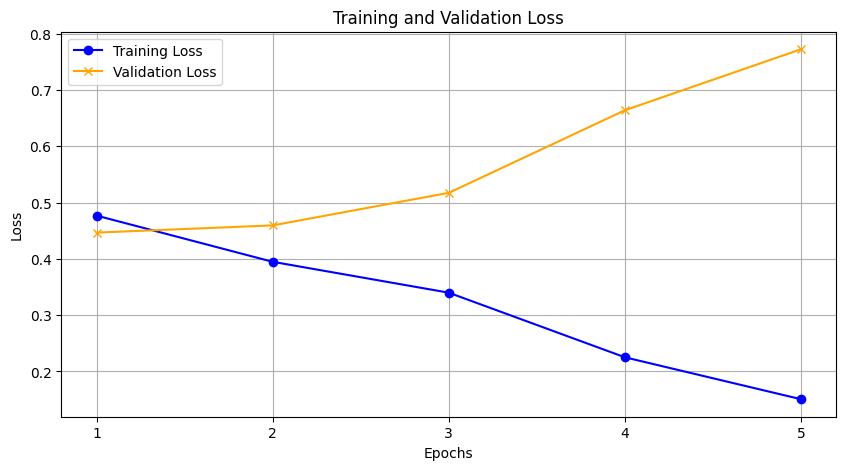

In [ ]:
import matplotlib.pyplot as plt

# Example lists of losses
# train_losses = [...]  # List of training losses
# val_losses = [...]    # List of validation losses
epochs = range(1, len(train_losses) + 1)  # Create a range for epochs

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Set x-ticks to be each epoch
plt.legend()
plt.grid()
plt.show()


**Evaluation**

F1 score from human voter as a baseline F1 score

In [ ]:
import pandas as pd
data = pd.read_csv('raichu.csv')
data.head(10)

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [ ]:
# Initialize the integer variables
# x1 = Actual class 0, Predicted as class 0
# x2 = Actual class 0, Predicted as class 1
# x3 = Actual class 0, Predicted as class 2
# x4 = Actual class 1, Predicted as class 0
# x5 = Actual class 1, Predicted as class 1
# x6 = Actual class 1, Predicted as class 2
# x7 = Actual class 2, Predicted as class 0
# x8 = Actual class 2, Predicted as class 1
# x9 = Actual class 2, Predicted as class 2


x1, x2, x3 = 0, 0, 0  # For class 0
x4, x5, x6 = 0, 0, 0  # For class 1
x7, x8, x9 = 0, 0, 0  # For class 2

# Iterate over each row in the DataFrame
for _, row in data.iterrows():
    if row['class'] == 0:
        x1 += row['hate_speech']
        x2 += row['offensive_language']
        x3 += row['neither']
    elif row['class'] == 1:
        x4 += row['hate_speech']
        x5 += row['offensive_language']
        x6 += row['neither']
    elif row['class'] == 2:
        x7 += row['hate_speech']
        x8 += row['offensive_language']
        x9 += row['neither']

# Output the results
print(f"x1, x2, x3 for class 0: {x1}, {x2}, {x3}")
print(f"x4, x5, x6 for class 1: {x4}, {x5}, {x6}")
print(f"x7, x8, x9 for class 2: {x7}, {x8}, {x9}")

x1, x2, x3 for class 0: 3227, 1081, 137
x4, x5, x6 for class 1: 3463, 57638, 1629
x7, x8, x9 for class 2: 262, 1100, 11846


In [ ]:
print("result from the above counting each row :", x1+x2+x3+x4+x5+x6+x7+x8+x9)

total_count = data['count'].sum()
print(f"Total sum of 'count' column: {total_count}")

result from the above counting each row : 80383
Total sum of 'count' column: 80383


In [ ]:
#F1 calculation for class 0

TP_0 = x1;
FP_0 = x4 + x7;
FN_0 = x2 + x3;

precision_0 = TP_0/(TP_0 + FP_0)
recall_0 = TP_0/(TP_0 + FN_0)
f1_0 = 2*(precision_0*recall_0)/(precision_0+recall_0)

In [ ]:
#F1 calculation for class 1

TP_1 = x5;
FP_1 = x2 + x8;
FN_1 = x4 + x6;

precision_1 = TP_1/(TP_1 + FP_1)
recall_1 = TP_1/(TP_1 + FN_1)
f1_1 = 2*(precision_1*recall_1)/(precision_1+recall_1)

In [ ]:
#F1 calculation for class 2

TP_2 = x9;
FP_2 = x3 + x6;
FN_2 = x7 + x8;

precision_2 = TP_2/(TP_2 + FP_2)
recall_2 = TP_2/(TP_2 + FN_2)
f1_2 = 2*(precision_2*recall_2)/(precision_2+recall_2)

In [ ]:
#Macro F1

macro_f1 = (f1_0 + f1_1 + f1_2)/3
macro_f1

0.7967707679474098

In [ ]:
!pip install pycm
import numpy as np
from pycm import ConfusionMatrix

#confusion matrix (rows: actual classes, columns: predicted classes)
confusion_matrix = np.array([
    [3227, 1081, 137],
    [3463, 57638, 1629],
    [262, 1100, 11846]
])

# Initialize ConfusionMatrix with actual and predicted arrays, or with the matrix directly
cm = ConfusionMatrix(matrix={"Class0": {"Class0": 3227, "Class1": 1081, "Class2": 137},
                             "Class1": {"Class0": 3463, "Class1": 57638, "Class2": 1629},
                             "Class2": {"Class0": 262, "Class1": 1100, "Class2": 11846}})

# Get the MCC score
mcc = cm.MCC
print("Matthew's Correlation Coefficient (MCC) for each class:", mcc)

# For an overall MCC, you can average across classes if needed
overall_mcc = np.mean(list(mcc.values()))
print("Overall MCC:", overall_mcc)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.3/606.3 kB 20.0 MB/s eta 0:00:00
Matthew's Correlation Coefficient (MCC) for each class: {'Class0': 0.5504467470022186, 'Class1': 0.7545580758720541, 'Class2': 0.86016486357584}
Overall MCC: 0.7217232288167043
